# Graphing Data with Matplotlib Exercises
The first thing to do with any Python code is to import libraries you will need. We will almost always need `numpy` for handling lists (arrays) of numbers and doing math. We will also use `matplotlib` to graph data. Import these libaries with the following commands.
```Python
import numpy as np
import matplotlib.pyplot as plt
```

This style of importing reminds you which library you are using because you will always need to start with `np.` or `plt.` to use routines in these libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Measured Data
Suppose you are measuring Ohm's Law for a series resistor circuit, where $R_1=R_2=100\pm 10~\Omega$. You vary the input voltage and measure the voltage drop across one of the resistors.

<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/SeriesCircuit.jpg?raw=true" width="400">

|V</sub>in</sub>|V<sub>1</sub>|
|---|---|
|1|0.49|
|2|1.02|
|3|1.48|
|4|2.01|
|5|2.53|

### Your Task
Create variables `R1` and `R2`. Put the data into `numpy` arrays called `Vin` and `V1`. These arrays are created using the following syntax.

`arrayname = np.array([value1, value2, ...)]`

In [3]:
R1=100
R2=100
Vin=np.array([1, 2, 3, 4, 5])
V1=np.array([0.49, 1.02, 1.48, 2.01, 2.53])

## Referencing Array Elements
Once you have an array, you can select individual values (or elements) in the array. Python is a "zero-counting" language, which means 0 is the first number used to list things. As a counter-example, Excel is a "one-counting" program. The first row in Excel is indexed as 1. If we want to select a value from an array, we reference its row number or column number or both. In the future we will be introduced to an array handling library where we can name the rows and columns, but with numpy we only have the numbers.

Here is an example where I print the value of $V_{in}$ in the second row. Keep in mind the second row is indexed as 1 in the array.

```python
print(Vin[1])
```

This would print 2. Now you try. Print the value of $V_1=2.01$

In [4]:
print(V1[3])

2.01


### Calculations from Data
The current through the resistor $R_1$ is $I = V_1/R_1$. Since this is a series circuit, the current is the same through $R_2$. Create a `numpy` array called `current`, and use Python to calculate the values for that array. Doing math on numpy arrays does not require creating the array. You can simply do math using the array names, and Python is "array-aware", meaning it does the math by matching the array elements. The arrays DO need to be the same size when you do arithmetic. Here is an example subtracting $V_{in}-V_1$.

```python
Vin-V1
```

In [5]:
current=V1/R1

## Plot Current vs. Voltage
We imported a library for plotting, `matplotlib.pyplot`. It can be called using `plt.*`, where `*` is a function within the library. For example,

```python
plt.plot(x, y)
```

will create a plot of data stored in arrays `x` and `y`. We can go much further though. You can try:

```python

plt.plot(x,y,'or-')

```

for a red solid line plot.  You can try:

```python

plt.plot(x,y,'b.')

```

for a blue scatter plot with small filled circles.  The following:

```python

plt.plot(x,y,'m+')

```

will produce magenta ``+`` symbols for the data points.

Here are letters for various colors.

| letter | color || letter | color |
| -- | -- | -- |  -- | -- |
|b | blue || m | magenta |
|g  |  green  ||  y  |  yellow  | 
|r  |  red || k  |  black |
|c | cyan || w | white |

Here are symbols for various types of markers.

| symbol | marker || symbol | marker |
| -- | -- | -- |  -- | -- |
| `s` | square marker | | `p` | pentagon marker |
|`D` | diamond marker | | `d` | thin diamond marker|
|`*` | star marker | | `+` | plus marker|
|`h` | hexagon1 marker | | `H` | hexagon2 marker|
|`x` | x marker | | | | |

Use `-` for solid line and `--` for a dashed line.

In the cell below, try plotting graphs with various markers and lines. If we want a legend, we need to label our data.

```python
plt.plot(x,y,'or', label="Data")
plt.legend(loc=0) #add a legend in the best location
plt.show()
```

The last line `plt.show()` creates the graph after decorating it with a legend. We can add more decorations, such as axis labels `plt.xlabel('Voltage')` and `plt.ylabel('Current')`. We can add gridlines. `plt.grid(True)`. These all go in between `plt.plot` and `plt.show()`.

Make a plot of current on the y-axis and voltage on the x-axis. Make the symbols and color anything you choose, but do not include a connecting line. Label the axes. Add a legend. Add gridlines.

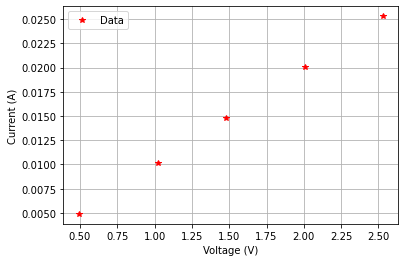

In [6]:
plt.plot(V1, current, '*r', label='Data')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend(loc=0)
plt.show()

## Curve Fitting
We will use a "non-linear least squares" library to add a best-fit line to the data. The library is `scipy.optimize.curve_fit`, where the periods indicate sub-libraries within the main library of `scipy`. To make it easy to call the curve_fit algorithms, use the following import method

``import scipy
from scipy.optimize import curve_fit``

The first line imports the entire `scipy` library, and anything in it can be called using `scipy.*`, where `*` indicates a sub-library. The second line imports the curve fitting algorithm so that it can be called using only `curve_fit`.

A least-squares algorithm will adjust constants in a function for the independent variable array you give it. In this case, the slope and intercept are the constants in a linear function. $V_1$ is your independent variable, and current is your dependent variable since it depends on voltage and resistance.

In the following cell, 
1. Perform the scipy imports.
2. Fill in initial guesses for the slope and intercept.
3. Fill in the equation for a line in the function.

In [7]:
#Imports
import scipy
from scipy.optimize import curve_fit

#initial guesses for slope and intercept
m = 100#slope
b = 1#intercept


#Funtion for fitting
def f_line(x, m, b):
    return m*x + b

We will use the `curve_fit` in its most basic form to begin. The way to call the `curve_fit` function is as follows.

```python
fit_params, fit_cov = curve_fit(function name, x values, y values, (slope,intercept))
```

The function call returns two lists of numbers. The first list `fit_params` is the slope and intercept that best fit the data. The second list `fit_cov` is a matrix (2x2 in this case) that gives the uncertainty of the slope and intercept along the diagonal and the correlation between slope and intercept along the off-diagonal. This covariant matrix is only relevant if we provide uncertainties in our data. So, we will ignore it for now. You may name the output arrays anything you wish because the `curve_fit` function creates and fills them based on the names you give. The function `curve_fit` requires the name of the function you want to use, the array of x measurements, the array of y measurements, and an initial guess for the fit parameters (slope and intercept). You might get an error because we have not included uncertainties. Simply run the code a second time to get results.

In the following cell, properly enter the `curve_fit` call. Then, print the fit parameters.

``print(fit_params)``

In [12]:
fit_params, junk = curve_fit(f_line, V1, current, (m, b))
print(fit_params)

[ 1.00000000e-02 -2.15183427e-12]


## Create Fit Arrays
Now, we want to graph the data and the fit line. We need to create `numpy` arrays to store the best-fit line. We could use the same set of x-values we measured, but there aren't very many of them. If this were a non-linear set of data, the fit line would look very zig-zaggy. So, let's create a best-fit line with plenty of points so that we know how to do that.

The first thing to do is to create x-values that are in the same range as your measurements, i.e., $0\leq V_1\leq 2.6$. We will use the `numpy` function `linspace`. It looks something like the following. See if you can figure out how to create the appropriate x array with 100 points.

```python
x_fit = np.linspace(x_min, x_max, numpts)
```

For the y-values, we simply use the linear function we already created, the `fit_params`, and the x-values we just created.

```python
y_fit = linear function(x, m, b)
```

Note that the function expects individual values for slope and intercept. Therefore we need to split them out of the `fit_params` array. Recall, how we looked at individual elements of the array above. The slope is the first row, and the intercept is the second row, and you need to zero-count.

In [13]:
x_fit = np.linspace(0, 2.6, 100)
y_fit = f_line(x_fit, fit_params[0], fit_params[1])

## Add the Line to Your Graph
Using what you know about plotting from above, create a plot just like before, but add the plot of the best-fit line as a solid black line.

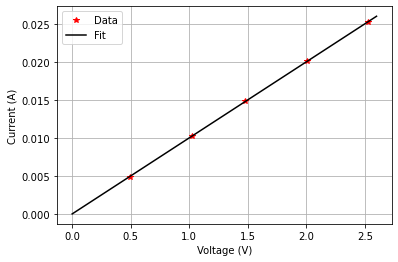

In [14]:
plt.plot(V1, current, '*r', label='Data')
plt.plot(x_fit, y_fit, '-k', label='Fit')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend(loc=0)
plt.show()